In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read and import data science job listings dataset
data_analysis_df = pd.read_csv("resources/final_data_analysis_df.csv")
data_analysis_df.set_index('index')

,Job Title,Rating,Company Name,Location,Size,Industry,Sector,Avg Salary(K),Job Location
index,,,,,,,,,
3,Data Scientist,3.8,PNNL\n3.8,"Richland, WA",1001 - 5000,Energy,"Oil, Gas, Energy & Utilities",76.5,WA
4,Data Scientist,2.9,Affinity Solutions\n2.9,"New York, NY",51 - 200,Advertising & Marketing,Business Services,114.5,NY
5,Data Scientist,3.4,CyrusOne\n3.4,"Dallas, TX",201 - 500,Real Estate,Real Estate,95.0,TX
6,Data Scientist,4.1,ClearOne Advantage\n4.1,"Baltimore, MD",501 - 1000,Banks & Credit Unions,Finance,73.5,MD
9,Data Scientist,4.6,<intent>\n4.6,"New York, NY",51 - 200,Internet,Information Technology,140.0,NY
...,...,...,...,...,...,...,...,...,...
919,MED TECH/LAB SCIENTIST- SOUTH COASTAL LAB,3.6,Beebe Healthcare\n3.6,"Millville, DE",1001 - 5000,Health Care Services & Hospitals,Health Care,56.5,DE
924,Data Scientist,3.2,"Numeric, LLC\n3.2","Philadelphia, PA",1 - 50,Staffing & Outsourcing,Business Services,128.5,PA
926,Scientist - Analytical Services,3.1,Reynolds American\n3.1,"Winston-Salem, NC",5001 - 10000,Consumer Products Manufacturing,Manufacturing,99.5,NC


In [ ]:
# Analysis 1: Average Salary vs Company Size

In [3]:
#First gonna make a new column to define our company size categories

# We define small companies as having 1-200 employees, 
# medium companies as having 201-1000 employees,
# and large companies as having 1001-10000+ employees

# Small companies: '1 - 50 ','51 - 200 '
# Medium companies: '201 - 500 ','501 - 1000 '
# Large companies: '1001 - 5000 ','5001 - 10000 ','10000+ '

size_avg_salary = data_analysis_df.copy()

#set conditions
conditions = [
    (size_avg_salary['Size'] == '1 - 50 '),
    (size_avg_salary['Size'] == '51 - 200 '), 
    (size_avg_salary['Size'] == '201 - 500 '),
    (size_avg_salary['Size'] == '501 - 1000 '), 
    (size_avg_salary['Size'] == '1001 - 5000 '),
    (size_avg_salary['Size'] == '5001 - 10000 '),
    (size_avg_salary['Size'] == '10000+ ')
    ]

# set list of new names
size_cat_list = ['1. Small','1. Small','2. Medium','2. Medium','3. Large','3. Large','3. Large']

# added 'Size Category column'
size_avg_salary['Size Category'] = np.select(conditions, size_cat_list)

# Sorted data frame by size category in ascending order
sorted_df=size_avg_salary.sort_values(by='Size Category')


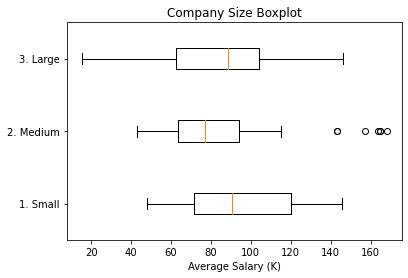

In [4]:
# Create a boxplot to get a detailed data distribution comparison between the 3 company categories

# Define size categories
size_categories = ['1. Small','2. Medium','3. Large']
# Made an empty list for data to be inserted in
size_cat_data = []

# for loop appending data to size category data list
for size in size_categories:
    current_size = sorted_df.loc[sorted_df['Size Category'] == size]
    size_cat_data.append(current_size['Avg Salary(K)'])

plt.boxplot(size_cat_data,vert=False, labels = size_categories)
plt.xlabel("Average Salary (K)")
plt.title("Company Size Boxplot")
plt.show()

In [ ]:
# Next we are going to extract the top 5 companies from each size category that have the corresponding top 5 
# highest average salary positions available

# Please not that we printed out enough positions to cover 5 different companies

In [5]:
# Small companies
# First extract rows from df that correspond to only small companies
small_companies = sorted_df[sorted_df['Size Category'] == '1. Small']
small_companies

# Next sort the df by highest salary and dropped any duplicates
sorted_small_company_salaries = small_companies.sort_values(by = 'Avg Salary(K)',ascending = False)
sorted_small_company_salaries[['Job Title','Company Name','Avg Salary(K)','Size','Size Category']].head(8)

# Below you can see the top 5 small companies with their respective job titles and avg salaries

,Job Title,Company Name,Avg Salary(K),Size,Size Category
161,Data Scientist,TechProjects\n4.8,145.5,1 - 50,1. Small
22,Data Scientist,1904labs\n4.7,143.5,51 - 200,1. Small
149,Data Scientist,1904labs\n4.7,143.5,51 - 200,1. Small
9,Data Scientist - Health Data Analytics,Nuna\n4.2,142.5,51 - 200,1. Small
66,Data Scientist - Health Data Analytics,Nuna\n4.2,142.5,51 - 200,1. Small
51,Data Scientist,<intent>\n4.6,140.0,51 - 200,1. Small
4,Data Scientist,<intent>\n4.6,140.0,51 - 200,1. Small
160,Data Scientist,e-IT Professionals Corp.\n3.5,139.5,51 - 200,1. Small


In [6]:
# Medium companies
# First extract rows from df that correspond to only small companies
med_companies = sorted_df[sorted_df['Size Category'] == '2. Medium']
med_companies

# Next sort the df by highest salary and dropped any duplicates
sorted_med_company_salaries = med_companies.sort_values(by = 'Avg Salary(K)',ascending = False)
sorted_med_company_salaries[['Job Title','Company Name','Avg Salary(K)','Size','Size Category']].head(6)

# Below you can see the top 5 medium companies with their respective job titles and avg salaries

,Job Title,Company Name,Avg Salary(K),Size,Size Category
192,Data Scientist - Sales,Confluent\n4.7,168.0,501 - 1000,2. Medium
156,Data Scientist,Samba TV\n3.3,164.5,201 - 500,2. Medium
122,Data Scientist,Samba TV\n3.3,164.5,201 - 500,2. Medium
5,Data Scientist,Wish\n3.5,163.5,501 - 1000,2. Medium
49,Data Scientist,Demandbase\n4.5,157.0,201 - 500,2. Medium
10,Data Scientist,Novetta\n4.0,143.0,501 - 1000,2. Medium


In [7]:
# Large companies
# First extract rows from df that correspond to only large companies
large_companies = sorted_df[sorted_df['Size Category'] == '3. Large']
large_companies

# Next sort the df by highest salary and dropped any duplicates
sorted_large_company_salaries = large_companies.sort_values(by = 'Avg Salary(K)',ascending = False)
sorted_large_company_salaries[['Job Title','Company Name','Avg Salary(K)','Size','Size Category']].head(6)

# Below you can see the top 5 large companies with their respective job titles and avg salaries

,Job Title,Company Name,Avg Salary(K),Size,Size Category
8,Data Engineer I,Audible\n3.6,146.0,1001 - 5000,3. Large
34,Data Scientist,Johns Hopkins University Applied Physics Labor...,130.0,5001 - 10000,3. Large
193,"Enterprise Architect, Data",MassMutual\n3.6,129.5,5001 - 10000,3. Large
140,"Enterprise Architect, Data",MassMutual\n3.6,129.5,5001 - 10000,3. Large
154,Data Scientist,CBS Interactive\n3.5,128.0,1001 - 5000,3. Large
110,Data Scientist,Sotheby's\n3.6,128.0,1001 - 5000,3. Large


In [ ]:
# Analysis 2: Job Satisfaction 

In [8]:
# Dropping ratings with -1 Values meaning they were not available
job_satisfaction_df = data_analysis_df.drop(columns=['Job Title','Location','Size','Industry','Sector']).set_index('index')
job_satisfaction_df.drop(job_satisfaction_df[job_satisfaction_df['Rating']== -1.0].index,inplace = True)

In [9]:
rating_5 = job_satisfaction_df.nlargest(5, 'Rating')
rating_5

,Rating,Company Name,Avg Salary(K),Job Location
index,,,,
161,5.0,Gridiron IT\n5.0,132.5,FL
542,5.0,Royce Geospatial\n5.0,101.0,VA
587,4.8,TechProjects\n4.8,145.5,NY
35,4.7,New England Biolabs\n4.7,112.5,MA
61,4.7,1904labs\n4.7,143.5,MO


In [10]:
low_ratings = job_satisfaction_df.nsmallest(5, 'Rating')
low_ratings

,Rating,Company Name,Avg Salary(K),Job Location
index,,,,
811,2.2,"Rodan and Fields, LLC\n2.2",85.5,CA
142,2.3,Synagro\n2.3,62.0,MD
242,2.4,Teasdale Latin Foods\n2.4,52.5,IL
429,2.4,Teasdale Latin Foods\n2.4,52.5,IL
633,2.4,Teasdale Latin Foods\n2.4,52.5,IL


(1.0, 5.0)

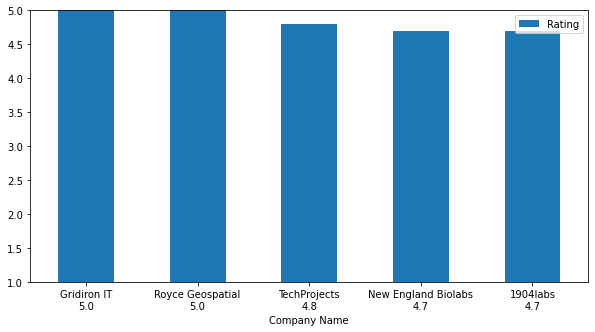

In [11]:
rating_5_bar = rating_5.plot.bar(x='Company Name', y='Rating', rot=0, figsize=(10,5))
plt.ylim(1, 5)

(1.0, 5.0)

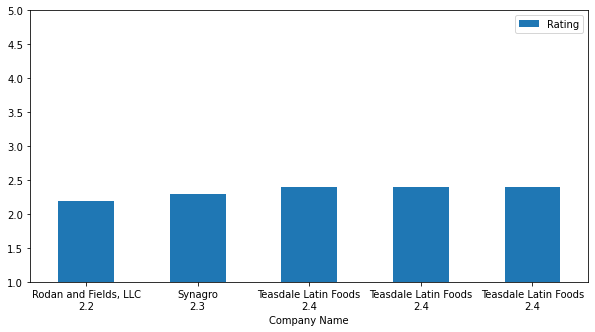

In [12]:
low_ratings_bar = low_ratings.plot.bar(x='Company Name', y='Rating', rot=0, figsize=(10,5))
plt.ylim(1, 5)

In [ ]:
# Analysis 3: Job Sector

In [13]:
sector = data_analysis_df.groupby("Sector")
sector_grouped = sector["Sector"].count().sort_values(ascending=False)
sector_grouped.head(10)
#From this, we can see that about 24% of the jobs listed are in the IT sector, 17% are in business services and 11% are in healthcare.
#This makes up about 50% of the job sectors we're looking at

Sector
Information Technology       58
Business Services            42
Health Care                  26
Finance                      22
Manufacturing                18
Aerospace & Defense          14
Biotech & Pharmaceuticals    10
Insurance                    10
Education                     7
Media                         5
Name: Sector, dtype: int64

Text(0.5, 1.0, 'Number of Jobs in Each Job Sector')

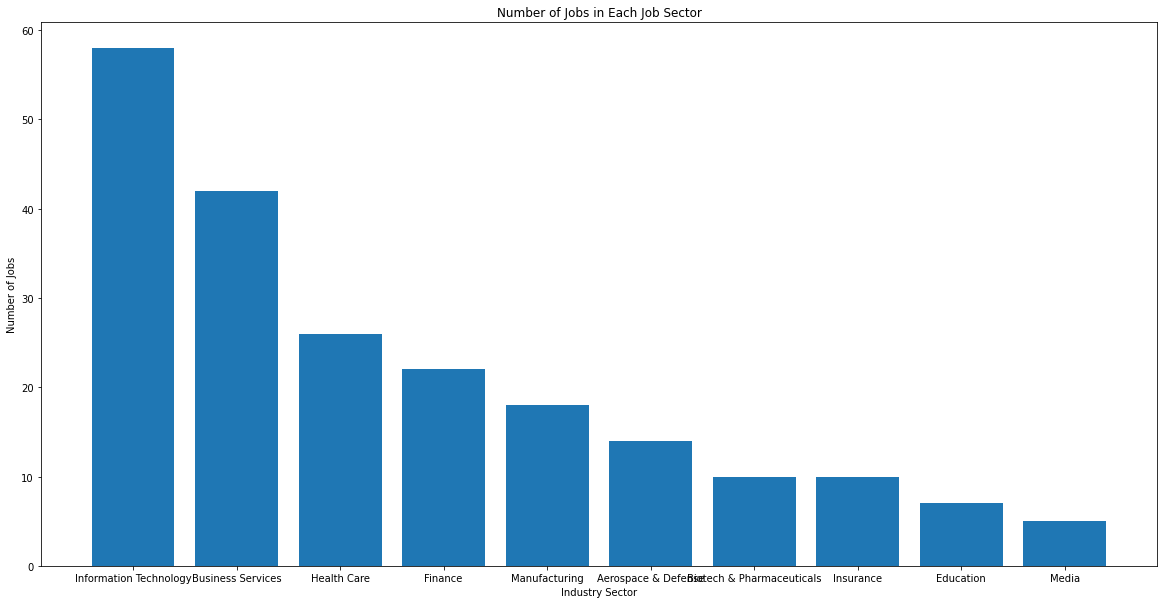

In [14]:
plt.figure(figsize=(20,10))
plt.bar(['Information Technology',"Business Services","Health Care","Finance","Manufacturing","Aerospace & Defense","Biotech & Pharmaceuticals","Insurance","Education","Media"],[58,42,26,22,18,14,10,10,7,5])
plt.xlabel("Industry Sector")
plt.ylabel("Number of Jobs")
plt.title("Number of Jobs in Each Job Sector")

In [ ]:
# Analysis 4: Average Salary vs State

Text(0.5, 1.0, 'Avg Salary(K) for United States')

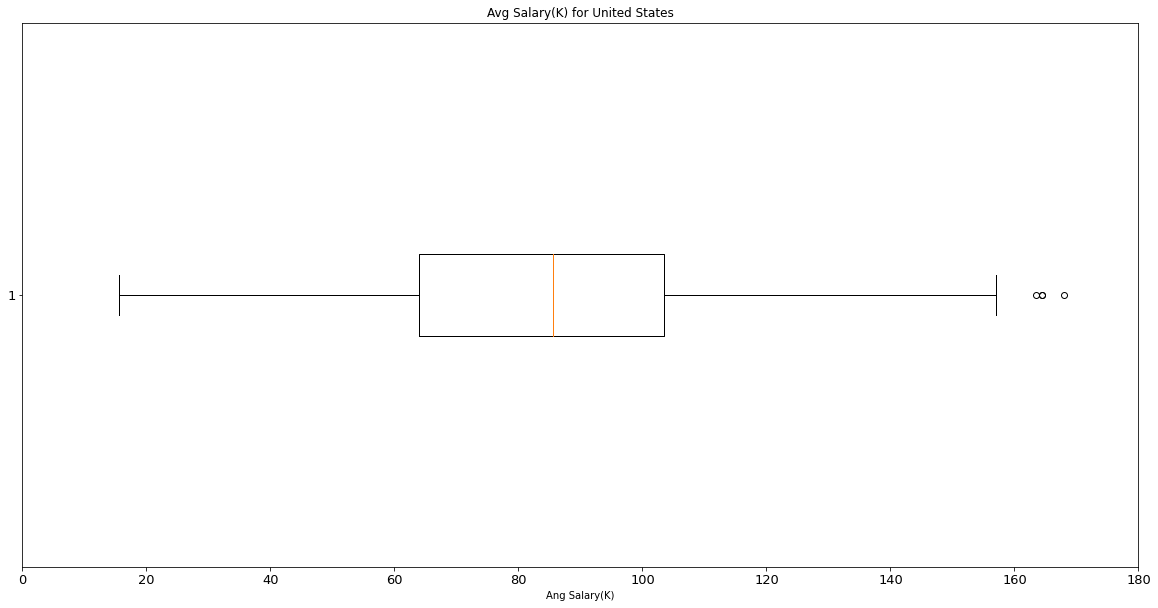

In [15]:
#Find the boxplot of all data given. This represents the median salary for the US. 
#We will use this to compare to other states to see if working in a specific state will affect the salary. 
plt.figure(figsize=(20,10))
plt.boxplot(data_analysis_df["Avg Salary(K)"], vert=False)
plt.xlim(0,180)
plt.tick_params(which='major', labelsize=13)
plt.xlabel("Ang Salary(K)")
plt.title("Avg Salary(K) for United States")

In [16]:
#Find the state with the most amount of data entries 
#This could be because these states have more people in them or could indicate that there are more job opportunities here
location= data_analysis_df.groupby('Job Location')
location["Job Location"].count().sort_values(ascending = False)

Job Location
CA    37
MA    26
VA    24
NY    24
TX    15
IL    10
PA     8
MD     7
WI     7
WA     6
DE     6
NJ     6
FL     6
NC     5
AZ     4
CO     4
MO     4
AL     4
KY     4
LA     3
KS     3
OR     3
CT     3
UT     3
IN     3
GA     3
IA     3
MI     2
MN     2
ID     2
NE     2
OH     2
DC     1
TN     1
Name: Job Location, dtype: int64

In [17]:
#Find the median salaries for top 5 states
#We are only using these states because they have the most data to analyze. 
#States with less than 15 data entries may not be a good representation of the average salaries for that state.
state = ["CA","MA","VA","NY","TX"]
avg_sal = []
for x in state:
    sepstate = data_analysis_df.loc[data_analysis_df["Job Location"]==x]["Avg Salary(K)"]
    avg_sal.append(sepstate)

Text(0.5, 1.0, 'Avg Salary(K) for Top 5 States')

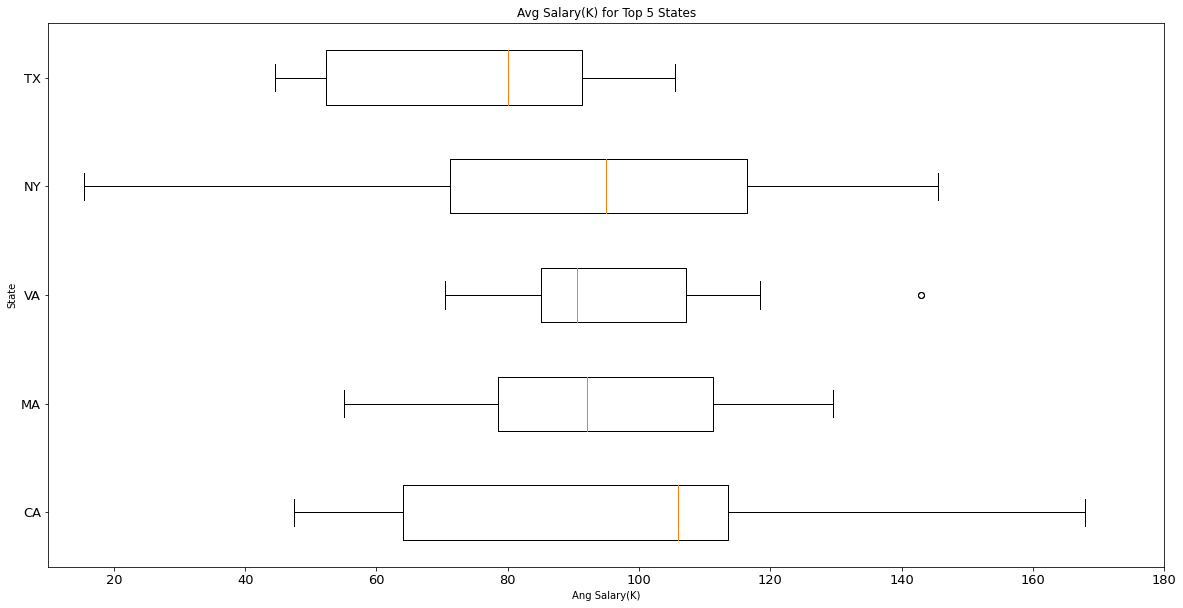

In [18]:
plt.figure(figsize=(20,10))
plt.boxplot(avg_sal, vert=False, flierprops={"marker":"o"})
plt.yticks(range(1,6),state)
plt.xlim(10,180)
plt.tick_params(which='major', labelsize=13)
plt.xlabel("Ang Salary(K)")
plt.ylabel("State")
plt.title("Avg Salary(K) for Top 5 States")

In [ ]:
#CA, MA, VA and NY have medians that are greater than the US average. 

In [ ]:
# Analysis 5: Average Salary vs City

In [19]:
#Sorting of top cities with entry level data science jobs

city = data_analysis_df.groupby('Location')
city['Location'].count().sort_values(ascending = False)

Location
New York, NY         22
San Francisco, CA    11
Cambridge, MA        10
Boston, MA            8
Chantilly, VA         6
                     ..
Nashville, TN         1
New Orleans, LA       1
Newark, NJ            1
Olympia, WA           1
Lyndhurst, NJ         1
Name: Location, Length: 103, dtype: int64

In [20]:
city = ['New York, NY', 'San Francisco, CA', 'Cambridge, MA', 'Boston, MA']
avg_sal = []
for x in city:
    city_sal = data_analysis_df.loc[data_analysis_df["Location"]==x]["Avg Salary(K)"]
    avg_sal.append(city_sal)

Text(0.5, 1.0, 'Avg Salary(K) for Top 4 Cities With Most Data Science Jobs')

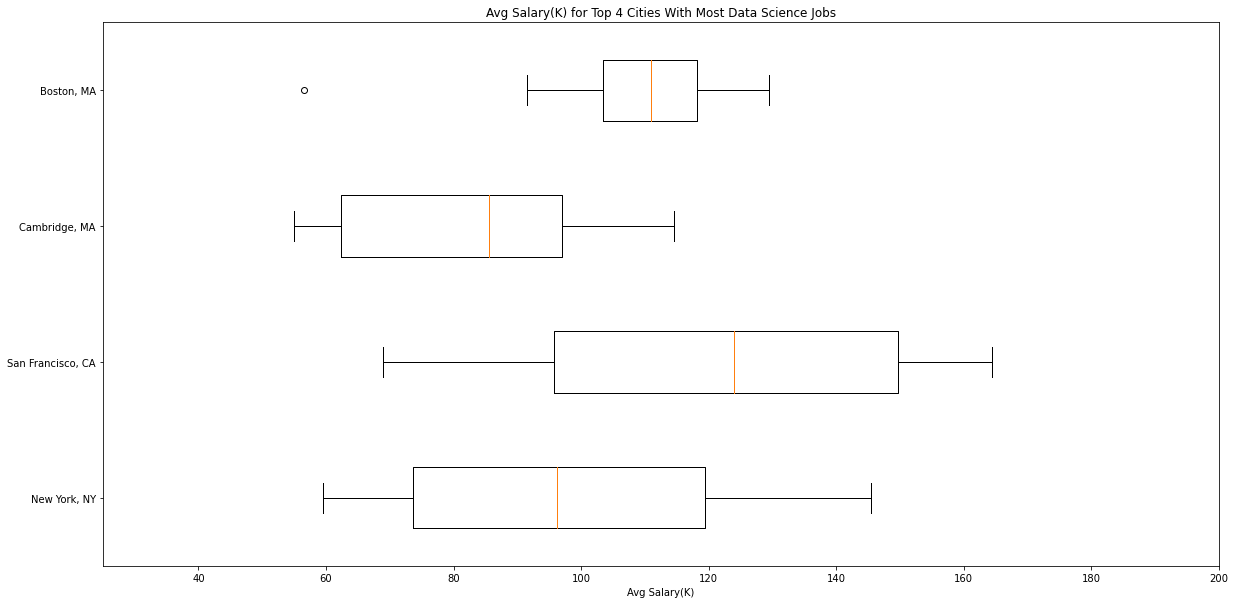

In [21]:
plt.figure(figsize=(20,10))
plt.boxplot(avg_sal, vert=False, flierprops={"marker":"o"})
plt.yticks(range(1,5),city)
plt.xlim(25,200)
plt.xlabel("Avg Salary(K)")
plt.title("Avg Salary(K) for Top 4 Cities With Most Data Science Jobs")

In [22]:
#Top 10 overall jobs printed
top_10 = data_analysis_df.sort_values(by='Avg Salary(K)',ascending = False).head(10)
top_10
#We can see that 50% of the top 10 highest paying jobs are in CA. 
#Additionally, 60% are in the IT sector and almost all titles are Data Scientist

,index,Job Title,Rating,Company Name,Location,Size,Industry,Sector,Avg Salary(K),Job Location
192,701,Data Scientist - Sales,4.7,Confluent\n4.7,"Mountain View, CA",501 - 1000,Computer Hardware & Software,Information Technology,168.0,CA
122,396,Data Scientist,3.3,Samba TV\n3.3,"San Francisco, CA",201 - 500,Advertising & Marketing,Business Services,164.5,CA
156,562,Data Scientist,3.3,Samba TV\n3.3,"San Francisco, CA",201 - 500,Advertising & Marketing,Business Services,164.5,CA
5,10,Data Scientist,3.5,Wish\n3.5,"San Jose, CA",501 - 1000,Other Retail Stores,Retail,163.5,CA
49,124,Data Scientist,4.5,Demandbase\n4.5,"San Francisco, CA",201 - 500,Computer Hardware & Software,Information Technology,157.0,CA
8,15,Data Engineer I,3.6,Audible\n3.6,"Newark, NJ",1001 - 5000,Motion Picture Production & Distribution,Media,146.0,NJ
161,587,Data Scientist,4.8,TechProjects\n4.8,"New York, NY",1 - 50,IT Services,Information Technology,145.5,NY
22,61,Data Scientist,4.7,1904labs\n4.7,"Saint Louis, MO",51 - 200,IT Services,Information Technology,143.5,MO
149,541,Data Scientist,4.7,1904labs\n4.7,"Saint Louis, MO",51 - 200,IT Services,Information Technology,143.5,MO
10,25,Data Scientist,4.0,Novetta\n4.0,"Herndon, VA",501 - 1000,Enterprise Software & Network Solutions,Information Technology,143.0,VA
